## PCA (Part 1)

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2017 Winter Term 2

Mike Gelbart

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Create a synthetic data set

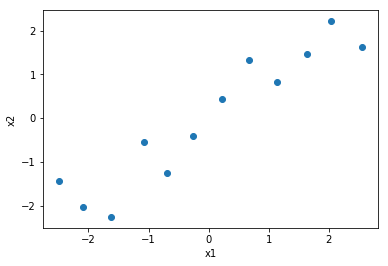

In [16]:
n = 12
d = 2

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = x1*0.7 + np.random.randn(n)*0.5
x1 = x1-np.mean(x1)
x2 = x2-np.mean(x2)

X = np.concatenate((x1[:,None],x2[:,None]),axis=1)

plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2');

Run PCA with k=1

In [17]:
k = 1
pca = PCA(n_components=k)
pca.fit(X);

### Visualizing PCA

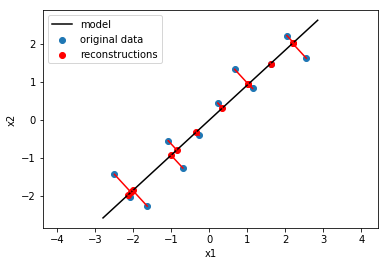

In [18]:
def make_plot(pca, X):
    W = pca.components_
    Z = pca.transform(X)

    # visualize the subspace spanned by W
    grid = np.linspace(min(X[:,0])-.3,max(X[:,0])+.3,1000)
    gridplot = (grid-pca.mean_[0])/W[0,0]*W[0,1]+pca.mean_[1]

    # visualize the reconstructions
    Xhat = pca.inverse_transform(Z)
    # xhat = Z@W + pca.mean_ # the same

    plt.scatter(X[:,0],X[:,1], label="original data")
    plt.xlabel('x1')
    plt.ylabel('x2');
    plt.plot(grid, gridplot, 'black', label="model")
    plt.scatter(Xhat[:,0],Xhat[:,1], c='red', label="reconstructions")
    plt.axis('equal');
    
    for i in range (X.shape[0]):
        plt.plot((X[i,0],Xhat[i,0]),(X[i,1],Xhat[i,1]), 'red')
    
    plt.legend()
    
make_plot(pca, X)

The line gives us a new, 1D coordinate system.

#### Moving to $d=3,k=2$

In [19]:
n = 12
d = 3

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = -x1*0.1 + np.random.randn(n)*2
x3 = x1*0.7 + np.random.randn(n)*3

X = np.concatenate((x1[:,None],x2[:,None],x3[:,None]),axis=1)
X = X - np.mean(X,axis=0)


Let's look at the points.

In [20]:
trace = go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode='markers')
fig = go.Figure(data=[trace])
iplot(fig)

Let's look at what PCA gives us

In [21]:
# fit PCA
pca = PCA(n_components=2)
pca.fit(X)

# get grid for visualizing plane
z1 = np.linspace(-7,7,100)
z2 = np.linspace(-7,7,100)
z1grid, z2grid = np.meshgrid(z1, z2)
Zgrid = np.concatenate((z1grid.flatten()[:,None],z2grid.flatten()[:,None]),axis=1)
Xgrid = pca.inverse_transform(Zgrid)
Xgrid_re = np.reshape(Xgrid, (100,100,3))

# get reconstructions of original points
Z = pca.transform(X)
Xhat = pca.inverse_transform(Z)

traces1 = []
for i in range(n):
    traces1.append(go.Scatter3d(x=(X[i,0],Xhat[i,0]), y=(X[i,1],Xhat[i,1]), z=(X[i,2],Xhat[i,2]), marker = dict(
        color = 'blue'
    )))

trace2 = go.Surface(x=Xgrid_re[:,:,0], y=Xgrid_re[:,:,1], z=Xgrid_re[:,:,2], showscale=False, opacity=0.9)

trace3 = go.Scatter3d(x=Xhat[:,0], y=Xhat[:,1], z=Xhat[:,2], mode='markers')

data =  traces1 + [trace2, trace3]

layout = go.Layout(showlegend=False)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

We can also make a scatter plot of these $Z$-values:

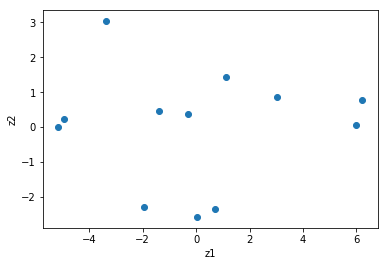

In [22]:
plt.scatter(Z[:,0],Z[:,1])
plt.xlabel('z1')
plt.ylabel('z2');

Above: this is projecting and rotating the data.

$d=3,k=1$

In [ ]:
n = 12
d = 3

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = -x1*0.1 + np.random.randn(n)*2
x3 = x1*0.7 + np.random.randn(n)*1.5

X = np.concatenate((x1[:,None],x2[:,None],x3[:,None]),axis=1)
X = X - np.mean(X,axis=0)

# fit PCA
pca = PCA(n_components=1)
pca.fit(X)

# get grid for visualizing plane
Zgrid = np.linspace(-7,7,100)[:,None]
Xgrid = pca.inverse_transform(Zgrid)

# get reconstructions of original points
Xhat = pca.inverse_transform(pca.transform(X))

traces1 = []
for i in range(n):
    traces1.append(go.Scatter3d(x=(X[i,0],Xhat[i,0]), 
                                y=(X[i,1],Xhat[i,1]), 
                                z=(X[i,2],Xhat[i,2]), 
                                marker={'color':'blue'}))

trace2 = go.Scatter3d(x=Xgrid[:,0], y=Xgrid[:,1], z=Xgrid[:,2], mode='lines', marker={'color':'black'})

trace3 = go.Scatter3d(x=Xhat[:,0], y=Xhat[:,1], z=Xhat[:,2], mode='markers')

data =  traces1 + [trace2, trace3]

layout = go.Layout(showlegend=False)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Inspecting the values

In [ ]:
k = 1
pca = PCA(n_components=k)
pca.fit(X);

In [ ]:
X

In [ ]:
Z = pca.transform(X)
Z

In [ ]:
W = pca.components_
W

In [ ]:
Xhat = pca.inverse_transform(Z)
Xhat